First 5 rows of dataset:
   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0

Missing values in dataset:
 6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64

----- SVM -----
Accuracy   : 0.7078
Recall     : 0.5185
Precision  : 0.5957
F1-Score   : 0.5545
Confusion Matrix:
[[81 19]
 [26 28]]

----- Naive Bayes -----
Accuracy   : 0.6688
Recall     : 0.5185
Precision  : 0.5283
F1-Score   : 0.5234
Confusion Matrix:
[[75 25]
 [26 28]]

----- Decision Tree -----
Accuracy   : 0.6883
Recall     : 0.5000
Precision  : 0.5625
F1-Score   : 0.5294
Confusion Matrix:
[[79 21]
 [27 27]]

----- KNN -----
Accuracy   : 0.7078
Recall     : 0.5370
Precision  : 0.5918
F1-Score   : 0.5631
Confusion Matrix:
[[80 20]
 [25 29]]


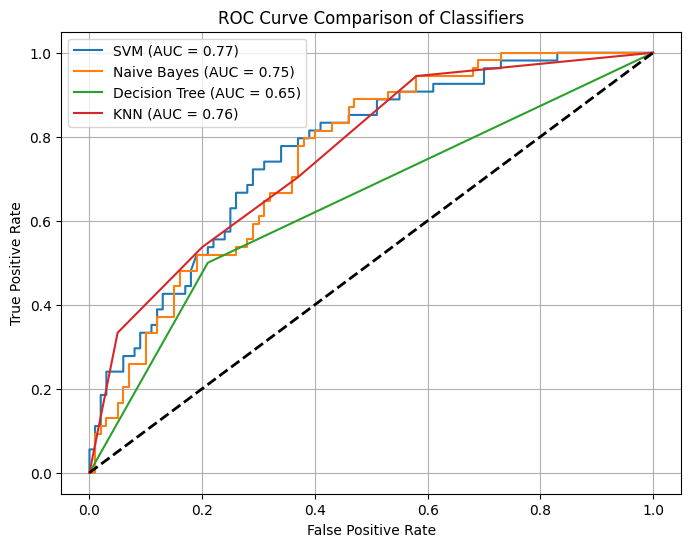

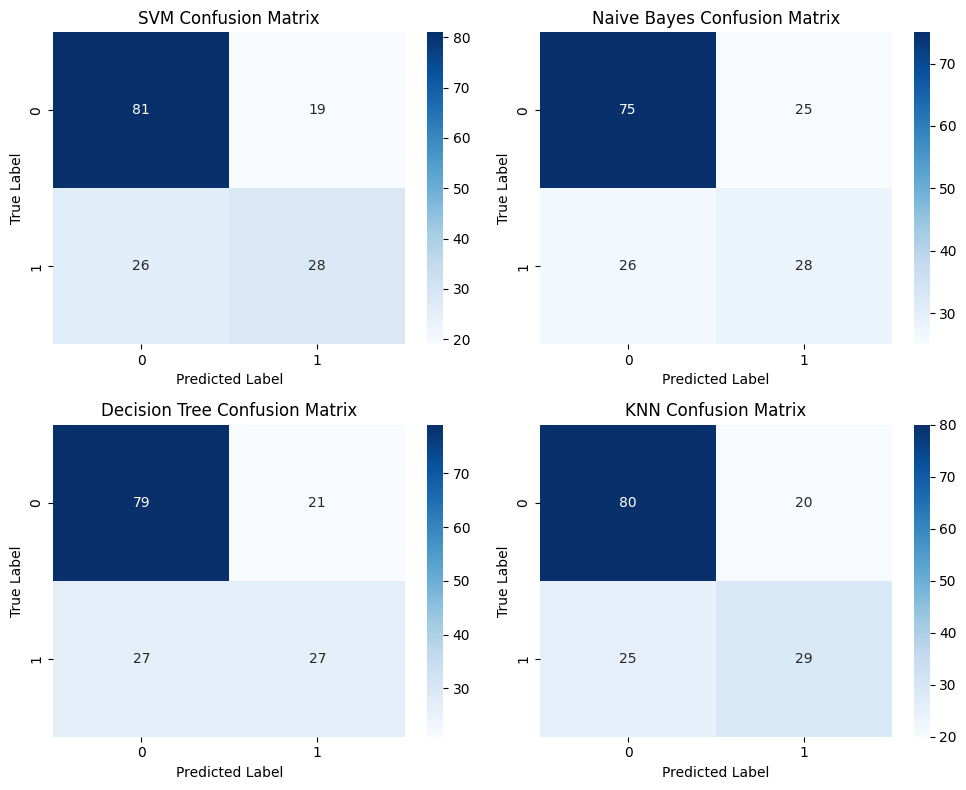


===== COMPARISON SUMMARY TABLE =====

               Accuracy    Recall Precision  F1-Score
SVM            0.707792  0.518519  0.595745  0.554455
Naive Bayes    0.668831  0.518519  0.528302  0.523364
Decision Tree  0.688312       0.5    0.5625  0.529412
KNN            0.707792  0.537037  0.591837  0.563107

Summary table saved as 'diabetes_classifiers_comparison.csv'


In [1]:
# ----------------------------------------
# Diabetes Prediction using Multiple Algorithms
# ----------------------------------------

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_curve, auc
)

# Import classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# ----------------------------------------
# 1. Load Dataset
# ----------------------------------------
data = pd.read_csv("pima-indians-diabetes.data.csv")
print("First 5 rows of dataset:")
print(data.head())

# Optional: check for null values
print("\nMissing values in dataset:\n", data.isnull().sum())

# ----------------------------------------
# 2. Define Features and Target
# ----------------------------------------
# Assuming last column is 'Outcome' (1 = Diabetic, 0 = Non-diabetic)
X = data.iloc[:, :-1]   # all features
y = data.iloc[:, -1]    # target variable

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize feature values (important for SVM & KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------------------
# 3. Initialize Models
# ----------------------------------------
models = {
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# ----------------------------------------
# 4. Train, Predict, and Evaluate Models
# ----------------------------------------
results = {}
plt.figure(figsize=(8, 6))

for name, model in models.items():
    print(f"\n----- {name} -----")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # for ROC curve

    # Calculate performance metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "Recall": rec,
        "Precision": prec,
        "F1-Score": f1,
        "Confusion Matrix": cm
    }

    # Print metrics
    print(f"Accuracy   : {acc:.4f}")
    print(f"Recall     : {rec:.4f}")
    print(f"Precision  : {prec:.4f}")
    print(f"F1-Score   : {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

# ----------------------------------------
# 5. Plot ROC Curve for All Models
# ----------------------------------------
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve Comparison of Classifiers")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------
# 6. Heatmap of Confusion Matrices
# ----------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for i, (name, model_results) in enumerate(results.items()):
    cm = model_results["Confusion Matrix"]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# ----------------------------------------
# 7. Print Summary Table
# ----------------------------------------
summary = pd.DataFrame(results).T.drop(columns=["Confusion Matrix"])
summary = summary.round(4)
print("\n===== COMPARISON SUMMARY TABLE =====\n")
print(summary)

# Optional: Save summary table
summary.to_csv("diabetes_classifiers_comparison.csv", index=True)
print("\nSummary table saved as 'diabetes_classifiers_comparison.csv'")